In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# The infection rate and the transmission rate are taken from ICMR data dated March 22,2020 

In [74]:
#total population of india 1.2Billion
N = 1.2e8
#As of date 22nd March Io is infected(Active Cases) and Ro is recovered(recovered+death)
I_o,R_o = 365,31
#no of susceptible cases
S_o = N - I_o - R_o
# Contact rate beta, and mean recovery rate gamma, (in 1/days).
beta,gamma = 2.75/2.3, 1./2.3
#A grid of timespace
t = np.linspace(1,30,30)

In [75]:
#SIR model differencial equation
def diff_equ(y,t,N,beta,gamma):
    S,I,R = y
    dSdt = -beta*S*I/N
    dIdt = beta*I*S/N
    dRdt = gamma*I
    return dSdt,dIdt,dRdt
#Initial Condition Vector
Y_o = S_o,I_o,R_o
#combine diff_equ function with odeint in time grid t
ode_return = odeint(diff_equ,Y_o,t,args=(N,beta,gamma))
S,I,R = ode_return.T

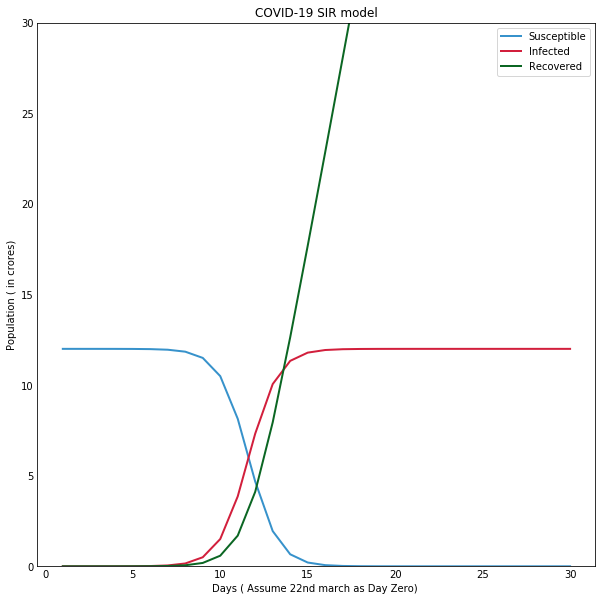

In [81]:
fig = plt.figure(facecolor='w',figsize=(10,10))
ax = fig.add_subplot( facecolor='w',axisbelow=True)
ax.plot(t, S/10000000, '#3792cb', alpha=1, lw=2, label='Susceptible')
    #ax.plot(t, E, '#ffaa1d', alpha=1, lw=2, label='Exposed')
ax.plot(t, I/10000000, '#d21f3c', alpha=1, lw=2, label='Infected')
ax.plot(t, R/10000000, '#0b6623', alpha=1, lw=2, label='Recovered')
ax.set_xlabel('Days ( Assume 22nd march as Day Zero) ')
ax.set_ylabel('Population ( in crores)')
ax.set_ylim(0,30.0)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.title("COVID-19 SIR model")

legend = ax.legend()